In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("D:\\D DRIVE BACKUP\\Semester 6\\NLP\\Project\\twitter_gender.csv",encoding="latin")

In [7]:
!pip install wordcloud

In [9]:
df.head(5)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [10]:
df.tail()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN
20049,815757985,True,golden,249,NaN,female,1.0000,yes,1.0,4/14/14 17:22,...,https://pbs.twimg.com/profile_images/655134724...,0,C0DEED,I think for my APUSH creative project I'm goin...,NaN,2922,10/26/15 13:19,6.587400e+17,NaN,NaN


In [11]:
df = df[["text", "gender"]]
df = df.loc[df["gender"].isin(["male", "female", "brand"])]
df.head(10)

,text,gender
0,Robbie E Responds To Critics After Win Against...,male
1,ÛÏIt felt like they were my friends and I was...,male
2,i absolutely adore when louis starts the songs...,male
3,Hi @JordanSpieth - Looking at the url - do you...,male
4,Watching Neighbours on Sky+ catching up with t...,female
5,"Ive seen people on the train with lamps, chair...",female
6,@BpackEngineer Thank you for your patience whi...,brand
7,Gala Bingo clubs bought for å£241m: The UK's l...,male
8,@_Aphmau_ the pic defines all mcd fangirls/fan...,female
9,@Evielady just how lovely is the tree this yea...,female


In [12]:
def categorize():
    g_list = []
    for val in df["gender"]:
        if val == "male":
            g_list.append(0)
        elif val == "female":
            g_list.append(1)
        elif val == "brand":
            g_list.append(2)
    return np.array(g_list)
g_list = categorize()
df["gender"] = categorize()

In [13]:
df.head(5)

,text,gender
0,Robbie E Responds To Critics After Win Against...,0
1,ÛÏIt felt like they were my friends and I was...,0
2,i absolutely adore when louis starts the songs...,0
3,Hi @JordanSpieth - Looking at the url - do you...,0
4,Watching Neighbours on Sky+ catching up with t...,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18836 entries, 0 to 20049
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    18836 non-null  object
 1   gender  18836 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 367.9+ KB


In [15]:
df.dropna(inplace=True)  #remove the null values
df.reset_index(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18836 entries, 0 to 18835
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   18836 non-null  int64 
 1   text    18836 non-null  object
 2   gender  18836 non-null  int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 368.0+ KB


In [17]:
from sklearn.model_selection import train_test_split
X = df[["text"]]
y = df[["gender"]]

In [18]:
#importing all the important Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import string
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
import string
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [19]:
def clean_text(text):
    # Remove punctuation and special characters
    text = text.translate(str.maketrans('', '', string.punctuation + '\n'))
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if not token in stop_words]
    # Lemmatize the tokens
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

In [20]:
# Clean the text data
df['new_text'] = df['text'].apply(clean_text)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['new_text'])
y = df['gender']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

#now fit the train data into the random forest classifier and predict the result and also accuracy 
res=RandomForestClassifier(n_estimators=100 , random_state=42)
res.fit(X_train,y_train)
y_pred=res.predict(X_test)

In [22]:
print(y_pred)

[1 1 0 ... 1 1 0]


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy of the model is :', accuracy_score(y_test, y_pred))

Accuracy of the model is : 0.5161889596602972


In [24]:
import joblib

In [30]:
joblib.dump(res, 'trained_model.pkl')

['trained_model.pkl']

In [31]:
text='Just tried the new vegan burger at my favorite restaurant and it was amazing! Highly recommend for anyone looking for a tasty plant-based option. #vegan #plantbased #foodie"'
model=joblib.load('trained_model.pkl')

In [32]:
preprocessed_text=clean_text(text)
print(preprocessed_text)

tried new vegan burger favorite restaurant amazing highly recommend anyone looking tasty plantbased option vegan plantbased foodie


In [33]:
final_vector=vectorizer.transform([preprocessed_text])
predictions = model.predict(final_vector)

#now print the label of the tweets
if(predictions[0]==0):
    print("This tweet has been made by the Male")
elif(predictions[0]==1):
    print("This tweet has been made by the female")
else:
    print("This tweet has been made by the Brand Company")

This tweet has been made by the Brand Company


['Just', 'tried', 'the', 'new', 'vegan', 'burger', 'at', 'my', 'favorite', 'restaurant', 'and', 'it', 'was', 'amazing!', 'Highly', 'recommend', 'for', 'anyone', 'looking', 'for', 'a', 'tasty', 'plant-based', 'option.', '#vegan', '#plantbased', '#foodie"']


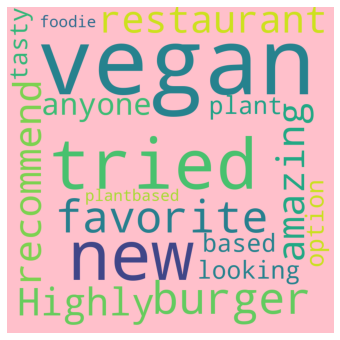

In [34]:
#import the word cloud and the and plot the word  cloud
from wordcloud import WordCloud

#first split the text using the split methods
result_words=text.split()
print(result_words)

final_text=' '.join(result_words)

wordcloud = WordCloud(width=800 ,height=800 ,background_color='pink').generate(final_text)

#plot the word cloud
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()